# WeatherPy
----



## Observations

For Latitude vs. Temperature Plot, it shows that temperatures are at their highest nearest the equator.  Temperatures decrease the closer they get to the poles.
For the Northern Hemisphere - Max Temp vs. Latitude Linear Regression there is a negative correlation.  As the latitude increases (moves farther away from the equator), the temperature decreases.
For the Southern Hemisphere - Max Temp vs. Latitude Linear Regression, there is a positive correlation.  As latitude increases (moves closer to the equator), the temperature increases.
For the Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression. the correlation is very low, so low that the correlation is pretty negligible.
For the Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression. the correlation is very low, so low that the correlation is pretty negligible.




#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
from citipy import citipy
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from config import weather_api_key
from pprint import pprint
import time
import os

## Generate Cities List

In [58]:
curr_date = pd.to_datetime('today').date().strftime('%m/%d/%Y')

city_names = []
city_country_codes = []
city_count = 0


for i in range(2000):
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lon)
    
    if city.city_name not in city_names:
        city_names.append(city.city_name)
        city_country_codes.append(city.country_code)
        
city_count=len(city_names)
print(city_count)

769


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

city_temps = []
city_lats = []
city_longs = []
city_hums = []
city_clouds = []
city_winds = []
cities_gathered = []
countries_gathered = []
city_dates = []
dash = '--------------------------'


n = 50
num = 10
city_name_list = [city_names[i * n:(i + 1) * n] for i in range((len(city_names) + n - 1) // n )]
city_country_codes_list = [city_country_codes[i * n:(i + 1) * n] for i in range((len(city_country_codes) + n - 1) // n )]

print(f'Beginning Retrieving Data')
print(dash)


for i in range(len(city_name_list)):
        time.sleep(num)
        for j in range(len(city_name_list[i])):
            one_city = city_name_list[i][j]
            one_country_code = city_country_codes_list[i][j]
            print(f'Processing record {j+1} of Group{i+1} | {one_city}, {one_country_code}')
            url = f'http://api.openweathermap.org/data/2.5/weather?q={one_city},{one_country_code}&units=imperial&appid={weather_api_key}'
            response = requests.get(url)
            if response.ok:
                response_json = response.json()
                cities_gathered.append(response_json['name'])
                city_lats.append(response_json['coord']['lat'])
                city_longs.append(response_json['coord']['lon'])
                city_temps.append(response_json['main']['temp_max'])
                city_hums.append(response_json['main']['humidity'])
                city_clouds.append(response_json['clouds']['all'])
                city_winds.append(response_json['wind']['speed'])     
                countries_gathered.append(response_json['sys']['country'])
                city_dates.append(response_json['dt']) 
            else:
                print('City not found. Skipping...')
      
        
print(dash)
print('Data Retrieval Complete')
print(dash)


# print(f'Beginning Retrieving Data')
# print(dash)

# for i in range(city_count):
#     print(f'Processing {i+1} of {city_count} | {city_names[i]}')
#     url = f'http://api.openweathermap.org/data/2.5/weather?q={city_names[i]},{city_country_codes[i]}&units=imperial&appid={weather_api_key}'
#     response = requests.get(url)
#     if response.ok:
#         response_json = response.json()
#         cities_gathered.append(response_json['name'])
#         city_lats.append(response_json['coord']['lat'])
#         city_longs.append(response_json['coord']['lon'])
#         city_temps.append(response_json['main']['temp_max'])
#         city_hums.append(response_json['main']['humidity'])
#         city_clouds.append(response_json['clouds']['all'])
#         city_winds.append(response_json['wind']['speed'])     
#         countries_gathered.append(response_json['sys']['country'])
#         city_dates.append(response_json['dt']) 
#     else:
#         print('City not found. Skipping...')

# print(dash)
# print('Data Retrieval Complete')
# print(dash)


Beginning Retrieving Data
--------------------------
Processing record 1 of Group1 | samarai, pg
Processing record 2 of Group1 | thompson, ca
Processing record 3 of Group1 | kaitangata, nz
Processing record 4 of Group1 | lake havasu city, us
Processing record 5 of Group1 | batagay, ru
Processing record 6 of Group1 | hermanus, za
Processing record 7 of Group1 | digapahandi, in
Processing record 8 of Group1 | fraserburgh, gb
Processing record 9 of Group1 | birao, cf
Processing record 10 of Group1 | madang, pg
Processing record 11 of Group1 | okhotsk, ru
Processing record 12 of Group1 | ushuaia, ar
Processing record 13 of Group1 | lolua, tv
City not found. Skipping...
Processing record 14 of Group1 | longyearbyen, sj
Processing record 15 of Group1 | chuy, uy
Processing record 16 of Group1 | svetlyy, ru
Processing record 17 of Group1 | sitka, us
Processing record 18 of Group1 | busselton, au
Processing record 19 of Group1 | nizhneyansk, ru
City not found. Skipping...
Processing record 20 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
city_weather_dict = {
    'City': cities_gathered,  
    'Lat': city_lats,
    'Lng': city_longs,
    'Max Temp': city_temps,
    'Humidity': city_hums,
    'Cloudiness': city_clouds,
    'Wind Speed': city_winds,
    'Country': countries_gathered,
    'Date': city_dates
    }
city_weather_data = pd.DataFrame(city_weather_dict)
city_weather_data
out_file = os.path.join('Output', 'city_weather_data.csv')
city_weather_data.to_csv(out_file, index=False)

In [94]:
city_weather_data_describe = city_weather_data.describe()
city_weather_data_describe

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,6.700000e+02
mean,18.717657,23.057985,68.158627,67.568657,49.014925,8.451940,1.600359e+09
std,33.426499,89.345158,16.969515,21.940208,38.118097,6.136539,1.780376e+02
min,-54.800000,-179.170000,20.390000,3.000000,0.000000,0.020000,1.600359e+09
25%,-9.352500,-56.135000,53.600000,56.000000,7.000000,3.750000,1.600359e+09
50%,21.540000,25.875000,71.565000,72.000000,47.000000,7.000000,1.600359e+09
75%,47.642500,105.065000,80.962500,84.000000,87.750000,11.410000,1.600360e+09
max,78.220000,179.320000,113.270000,100.000000,100.000000,47.940000,1.600360e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [95]:
#  Get the indices of cities that have humidity over 100%.
cd_greater_humidity = city_weather_data.loc[city_weather_data['Humidity'] > 100]

print(f'City weather data length is {len(city_weather_data)}')
print(f'Greater humidity length is {len(cd_greater_humidity)}')
cd_greater_humidity

City weather data length is 670
Greater humidity length is 0


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [96]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_data.drop(cd_greater_humidity.index, inplace=False)

print(f'Total records in clean_city_data dataframe is {len(clean_city_data)}')
clean_city_data

Total records in clean_city_data dataframe is 670


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Samarai,-10.62,150.67,78.69,87,100,16.22,PG,1600359318
1,Thompson,55.74,-97.86,35.60,64,20,8.05,CA,1600359252
2,Kaitangata,-46.28,169.85,39.00,74,0,5.99,NZ,1600359318
3,Lake Havasu City,34.48,-114.32,91.00,11,1,5.82,US,1600359318
4,Batagay,67.63,134.63,39.25,80,32,2.98,RU,1600359319
...,...,...,...,...,...,...,...,...,...
665,Verkhnevilyuysk,63.45,120.32,39.72,89,0,1.39,RU,1600359697
666,Nishihara,26.18,127.76,82.40,94,75,8.05,JP,1600359697
667,Poconé,-16.26,-56.62,96.67,17,96,4.88,BR,1600359698
668,Tamandaré,-8.76,-35.10,79.84,62,10,11.52,BR,1600359698


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

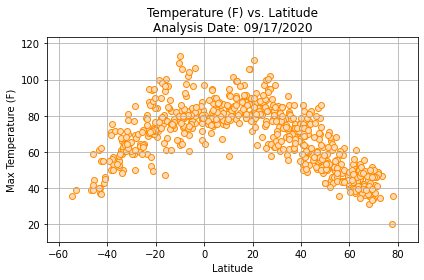

In [97]:
lat = clean_city_data['Lat']
max_temp = clean_city_data['Max Temp']


plt.scatter(x=lat, y=max_temp, marker="o", facecolors="peachpuff", edgecolors="darkorange")
plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(max_temp)-10, max(max_temp)+10)
plt.grid(b=None, which='major', axis='both')

plt.tight_layout()

plt.savefig(os.path.join("Output","maxtemps_lats.png"))

## Latitude vs. Humidity Plot

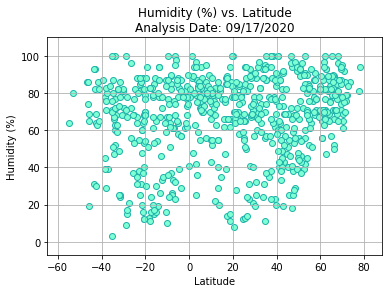

In [98]:
humidity = clean_city_data['Humidity']

plt.scatter(x=lat, y=humidity, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")
plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(humidity)-10, max(humidity)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats.png"))

## Latitude vs. Cloudiness Plot

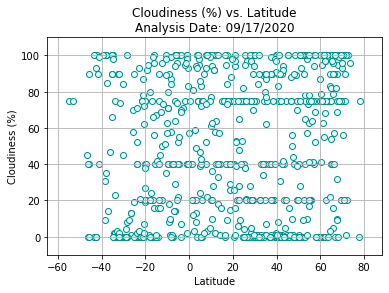

In [99]:
cloudiness = clean_city_data['Cloudiness']

plt.scatter(x=lat, y=cloudiness, marker="o", facecolors="lightcyan", edgecolors="darkcyan")
plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(cloudiness)-10, max(cloudiness)+10)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats.png"))

## Latitude vs. Wind Speed Plot

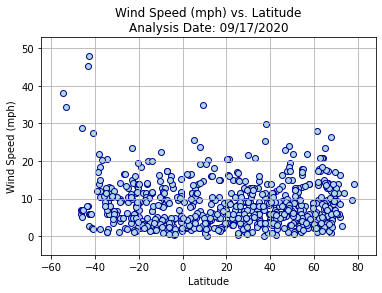

In [100]:
wind_speed = clean_city_data['Wind Speed']

plt.scatter(x=lat, y=wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")
plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(lat)-10, max(lat)+10)
plt.ylim(min(wind_speed)-5, max(wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats.png"))

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is -0.842
The p-value is 1.0468990976586638e-121


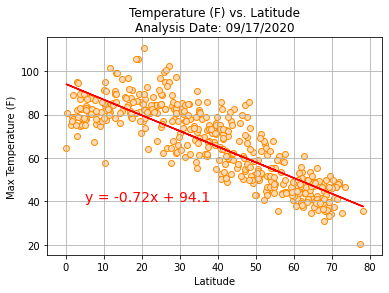

In [101]:
northern = clean_city_data.loc[clean_city_data['Lat'] >=0]
southern = clean_city_data.loc[clean_city_data['Lat'] <0]

northern_lats = northern['Lat']
northern_max_temps = northern['Max Temp']

correlation = sts.pearsonr(northern_lats, northern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_max_temps)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=northern_lats, y=northern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 40), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_max_temps)-5, max(northern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_latitude_lr_north.png"))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is 0.707
The p-value is 7.967043709079629e-35


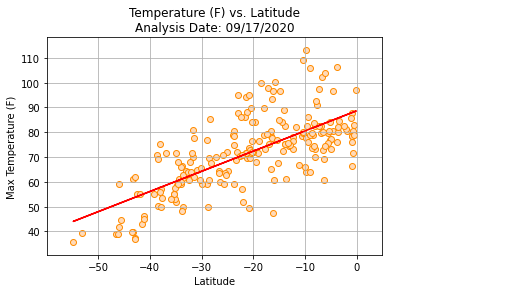

In [102]:
southern_lats = southern['Lat']
southern_max_temps = southern['Max Temp']

correlation = sts.pearsonr(southern_lats, southern_max_temps)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_max_temps)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_max_temps, marker="o", facecolors="peachpuff", edgecolors="darkorange")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (5, 40), fontsize=14, color="red")


plt.title(f"Temperature (F) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_max_temps)-5, max(southern_max_temps)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","maxtemps_lats_lr_south.png"))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.114
The p-value is 0.01585084604184002


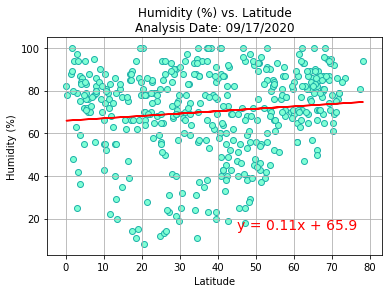

In [103]:
northern_hums = northern['Humidity']

correlation = sts.pearsonr(northern_lats, northern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_hums)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (45, 15), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_hums)-5, max(northern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_north.png"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.015
The p-value is 0.8262202741190143


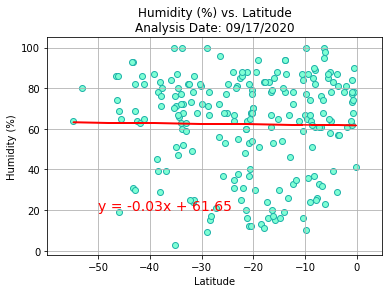

In [104]:
southern_hums = southern['Humidity']

correlation = sts.pearsonr(southern_lats, southern_hums)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_hums)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=southern_lats, y=southern_hums, marker="o", facecolors="aquamarine", edgecolors="lightseagreen")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Humidity (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_hums)-5, max(southern_hums)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","humidity_lats_lr_south.png"))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.138
The p-value is 0.0032926982424801815


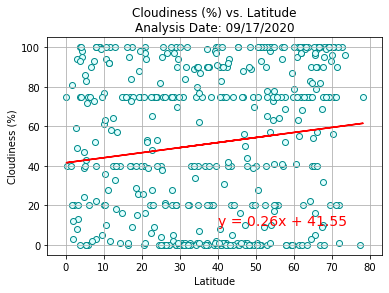

In [105]:
northern_clouds = northern['Cloudiness']

correlation = sts.pearsonr(northern_lats, northern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_clouds)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (40, 10), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_clouds)-5, max(northern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_north.png"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.107
The p-value is 0.11318339541419156


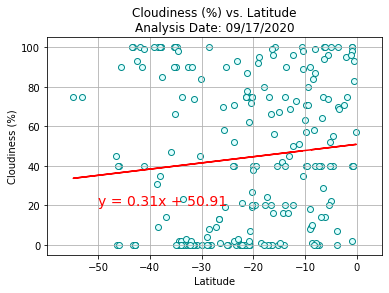

In [106]:
southern_clouds = southern['Cloudiness']

correlation = sts.pearsonr(southern_lats, southern_clouds)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_clouds)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_clouds, marker="o", facecolors="lightcyan", edgecolors="darkcyan")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50, 20), fontsize=14, color="red")


plt.title(f"Cloudiness (%) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_clouds)-5, max(southern_clouds)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","cloudiness_lats_lr_south.png"))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.097
The p-value is 0.04062612239965573


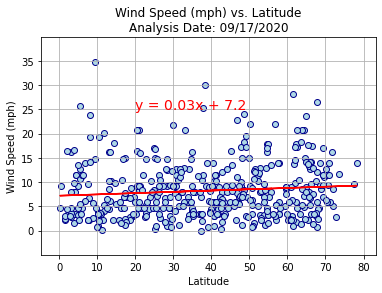

In [107]:
northern_wind_speed = northern['Wind Speed']

correlation = sts.pearsonr(northern_lats, northern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(northern_lats, northern_wind_speed)

# Calculate the predictions
regression_values = northern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=northern_lats, y=northern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(northern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (20,25), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(northern_lats)-5, max(northern_lats)+5)
plt.ylim(min(northern_wind_speed)-5, max(northern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_north.png"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.306
The p-value is 3.5051070129839462e-06


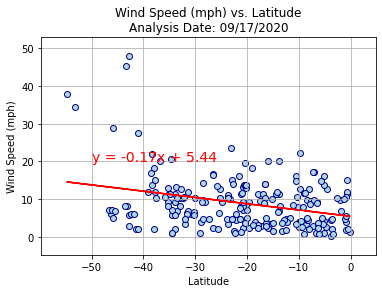

In [108]:
southern_wind_speed = southern['Wind Speed']


correlation = sts.pearsonr(southern_lats, southern_wind_speed)

print(f"The correlation coefficient (r) is {round(correlation[0],3)}")
print(f"The p-value is {correlation[1]}")


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = sts.linregress(southern_lats, southern_wind_speed)

# Calculate the predictions
regression_values = southern_lats * slope + intercept

# Create a variable for the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x=southern_lats, y=southern_wind_speed, marker="o", facecolors="lightblue", edgecolors="darkblue")

# Plot the regression line
plt.plot(southern_lats, regression_values, "red")

# Annotate the plot with the linear equation
plt.annotate(line_eq, (-50,20), fontsize=14, color="red")


plt.title(f"Wind Speed (mph) vs. Latitude\nAnalysis Date: {curr_date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(min(southern_lats)-5, max(southern_lats)+5)
plt.ylim(min(southern_wind_speed)-5, max(southern_wind_speed)+5)
plt.grid(b=None, which='major', axis='both')

plt.savefig(os.path.join("Output","windspeed_lats_lr_south.png"))